In [18]:
# Import dependencies
import pandas as pd
import hvplot.pandas
from path import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
file = Path('../Resources/feature_engineered_byPHUs_v2.csv')
covid_df = pd.read_csv(file)
covid_df

,reporting_phu,reporting_phu_address,reporting_phu_city,reporting_phu_postal_code,reporting_phu_website,reporting_phu_latitude,reporting_phu_longitude,reporting_phu_id,2019,2020,...,21-mar,21-apr,21-may,21-jun,21-jul,21-aug,21-sep,21-oct,21-nov,21-dec
0,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893,2253,0,42670,...,10872,23756,11744,1485,583,2308,2219,1330,20,0
1,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815,2234,0,1013,...,271,675,279,45,31,94,108,121,6,0
2,Northwestern Health Unit,210 First Street North,Kenora,P9N 2K4,www.nwhu.on.ca,49.769615,-94.488254,2249,0,198,...,220,255,94,27,13,23,52,18,0,0
3,"Kingston, Frontenac and Lennox & Addington Pub...",221 Portsmouth Avenue,Kingston,K7M 1V5,www.kflaph.ca,44.227874,-76.525211,2241,0,562,...,226,364,227,23,25,44,128,177,18,0
4,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,www.niagararegion.ca/health,43.116537,-79.241220,2246,0,4770,...,1421,4201,1572,381,101,526,846,495,35,0
5,North Bay Parry Sound District Health Unit,345 Oak Street West,North Bay,P1B 2T2,www.myhealthunit.ca,46.313207,-79.467840,2247,0,153,...,36,64,89,154,46,43,69,40,1,0
6,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298,2258,0,1651,...,674,935,255,24,28,173,515,315,1,0
7,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239,2270,0,19301,...,5974,12243,4749,484,353,1989,1657,950,33,0
8,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833,2243,0,709,...,407,349,90,18,9,44,93,33,2,0
9,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670,2268,0,9156,...,1006,1571,981,220,120,1535,1395,694,18,0


In [20]:
case_df = covid_df[['reporting_phu_id', '19-oct', '19-nov', 
'19-dec', '20-jan', '20-feb', '20-mar', '20-apr', '20-may', 
'20-jun', '20-jul', '20-aug', '20-sep', '20-oct', '20-nov', 
'20-dec', '21-jan', '21-feb', '21-mar', '21-apr', '21-may', 
'21-jun', '21-jul', '21-aug', '21-sep', '21-oct', '21-nov', 
'21-dec']]
case_df

,reporting_phu_id,19-oct,19-nov,19-dec,20-jan,20-feb,20-mar,20-apr,20-may,20-jun,...,21-mar,21-apr,21-may,21-jun,21-jul,21-aug,21-sep,21-oct,21-nov,21-dec
0,2253,0,0,0,1,7,686,2154,1976,1092,...,10872,23756,11744,1485,583,2308,2219,1330,20,0
1,2234,0,0,0,2,0,106,87,187,51,...,271,675,279,45,31,94,108,121,6,0
2,2249,0,0,0,0,0,10,7,6,18,...,220,255,94,27,13,23,52,18,0,0
3,2241,0,0,0,0,0,52,8,4,34,...,226,364,227,23,25,44,128,177,18,0
4,2246,0,0,0,0,0,202,348,158,61,...,1421,4201,1572,381,101,526,846,495,35,0
5,2247,0,0,0,0,0,10,8,9,8,...,36,64,89,154,46,43,69,40,1,0
6,2258,0,0,0,1,1,56,49,44,17,...,674,935,255,24,28,173,515,315,1,0
7,2270,0,0,0,0,11,611,1153,837,425,...,5974,12243,4749,484,353,1989,1657,950,33,0
8,2243,0,0,0,0,0,90,225,35,2,...,407,349,90,18,9,44,93,33,2,0
9,2268,0,0,0,0,1,240,440,332,624,...,1006,1571,981,220,120,1535,1395,694,18,0


In [21]:
case_df.isnull().values.any()

False

In [22]:
case_df2 = pd.get_dummies(case_df, columns=['reporting_phu_id'])
case_df2.head(10)

,19-oct,19-nov,19-dec,20-jan,20-feb,20-mar,20-apr,20-may,20-jun,20-jul,...,reporting_phu_id_2261,reporting_phu_id_2262,reporting_phu_id_2263,reporting_phu_id_2265,reporting_phu_id_2266,reporting_phu_id_2268,reporting_phu_id_2270,reporting_phu_id_3895,reporting_phu_id_4913,reporting_phu_id_5183
0,0,0,0,1,7,686,2154,1976,1092,689,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,106,87,187,51,20,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,10,7,6,18,3,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,52,8,4,34,11,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,202,348,158,61,116,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,10,8,9,8,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,56,49,44,17,14,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,11,611,1153,837,425,235,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,90,225,35,2,2,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,240,440,332,624,707,...,0,0,0,0,0,1,0,0,0,0


In [23]:
case_scaled = StandardScaler().fit_transform(case_df2)
print(case_scaled)

[[ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
  -0.17407766]
 [ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
  -0.17407766]
 [ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
  -0.17407766]
 ...
 [ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
   5.74456265]
 [ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
  -0.17407766]
 [ 0.         -0.17407766  0.         ... -0.17407766 -0.17407766
  -0.17407766]]


In [24]:
# Taking pca that covers 95% of the data
# pca = PCA(n_components=0.95, random_state=0)
# pcs = pca.fit_transform(case_scaled)
# pcs

array([[ 1.16264121e+01,  1.97653758e-01, -1.16255694e+00, ...,
        -4.72868500e-30, -4.97708836e-47,  1.02567321e-92],
       [-1.72138458e+00, -8.85752761e-01,  1.56535678e+00, ...,
        -1.07240668e+00,  1.22439366e-01, -1.09086823e+00],
       [-2.48809695e+00, -3.10045716e-01, -3.67227334e-01, ...,
         3.23705179e+00, -2.68831203e+00,  4.40759236e-01],
       ...,
       [-2.18836029e+00, -2.12376277e-01, -3.89743476e-01, ...,
        -3.29673781e-01,  4.28732225e-02, -1.64009012e+00],
       [-2.50142807e+00, -2.94047693e-01, -3.50057109e-01, ...,
         2.16209794e+00,  3.36317073e+00, -1.73865630e+00],
       [-1.52846767e-01,  2.64842294e-02,  3.03052532e-01, ...,
        -2.78651209e-01,  2.07897627e-01, -2.69194932e-01]])

In [25]:
# cVariance = pca.explained_variance_ratio_
# cVariance

array([0.3649672 , 0.03584109, 0.03222653, 0.02664807, 0.02522525,
       0.02377488, 0.02151914, 0.02103339, 0.01949014, 0.01908379,
       0.01841707, 0.01803508, 0.01800563, 0.0178989 , 0.01787653,
       0.01785299, 0.01780673, 0.0177903 , 0.01778848, 0.01777661,
       0.0177703 , 0.01776676, 0.01776568, 0.01776483, 0.01776385,
       0.01776385, 0.01776385, 0.01776385, 0.01776385, 0.01776385,
       0.01776385])

In [27]:
# print(f"Sum of Variances: {sum(cVariance)}, Length: {len(cVariance)}")

Sum of Variances: 0.9644723092998954, Length: 31


In [28]:
# PC_names = []
# def assign_name(x):
#     for i in range(len(x)):
#         name = f"PC{i+1}"
#         PC_names.append(name)

In [29]:
# assign_name(cVariance)

In [30]:
# pcs_df = pd.DataFrame(
#     data = pcs,
#     columns = PC_names,
#     index = case_df.index
# )
# pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,11.626412,0.197654,-1.162557,3.837418,1.248413,-1.816270,0.123831,-2.546521,2.529622,-0.962131,...,-0.223949,0.042897,0.214735,1.351220e-77,2.596540e-62,-1.610834e-108,-4.115721e-01,-4.728685e-30,-4.977088e-47,1.025673e-92
1,-1.721385,-0.885753,1.565357,-1.354619,-1.575760,-1.789689,0.204914,1.088720,1.913673,-0.029993,...,-0.312020,-0.672347,1.693174,-3.404272e-01,-8.334807e-02,8.898740e-01,6.042997e-01,-1.072407e+00,1.224394e-01,-1.090868e+00
2,-2.488097,-0.310046,-0.367227,0.691762,-0.833500,-0.370310,-0.067974,0.104825,-0.365341,-0.211858,...,0.239945,-0.511285,2.876140,-5.583523e-01,-8.650148e-01,3.428311e-01,8.326148e-01,3.237052e+00,-2.688312e+00,4.407592e-01
3,-2.073081,0.067536,-0.553805,-1.022935,-0.547936,0.561414,-0.785348,-0.966652,-0.113473,-0.751046,...,0.515445,-0.773462,0.324945,3.147284e-01,-2.967090e-01,1.870561e+00,3.404057e-01,3.291280e-01,1.813194e-01,1.850474e+00
4,0.051822,0.425151,-0.726990,-2.156067,0.799153,1.481120,-1.845219,-2.013400,0.314988,-0.026114,...,-0.740758,-0.065834,0.401592,5.021252e-01,9.417027e-02,5.512494e-01,-3.814866e-01,2.173519e-01,5.569890e-02,-1.838754e-01
5,-2.424008,-0.380892,-0.112503,0.664784,-0.438094,-0.180015,-0.075053,-0.135606,-0.570346,-0.317875,...,0.829546,-0.860462,2.442583,6.662811e-01,1.708514e+00,-1.604911e+00,1.413115e-01,-9.109897e-01,2.992695e+00,2.228776e+00
6,-1.595404,-0.478860,0.314706,-0.357456,-0.846111,-0.826414,0.854033,1.126223,1.840607,1.016151,...,-0.436979,2.256763,0.363746,4.925186e-01,-1.270524e-01,-2.146643e-01,5.687043e-02,3.258906e-01,2.126051e-01,-8.390239e-01
7,5.376011,0.585816,-2.012194,-0.466823,0.362486,3.990360,2.878495,1.758003,0.988039,-2.326361,...,0.453523,0.327377,0.010086,-2.682500e-01,9.801485e-03,-1.358744e-02,2.182013e-01,2.586733e-01,-4.263500e-02,2.905351e-01
8,-2.313266,-0.263985,-0.426545,0.423430,-0.978236,-0.243636,-0.068329,0.105116,-0.827547,0.139630,...,-1.164332,1.855009,0.761249,-1.815415e+00,-3.331683e-01,2.617269e-01,-1.668063e+00,-1.084698e+00,-5.242754e-01,2.941412e-01
9,1.456606,1.028668,-2.509878,-1.512179,3.729949,-2.828344,-1.745387,2.800534,-0.790481,-1.496365,...,0.045608,0.184417,0.022586,1.849905e-01,1.041259e-01,2.805707e-02,5.272654e-02,7.285118e-03,2.095262e-02,-2.996329e-01


In [31]:
mergings = linkage(case_scaled, method = 'ward')

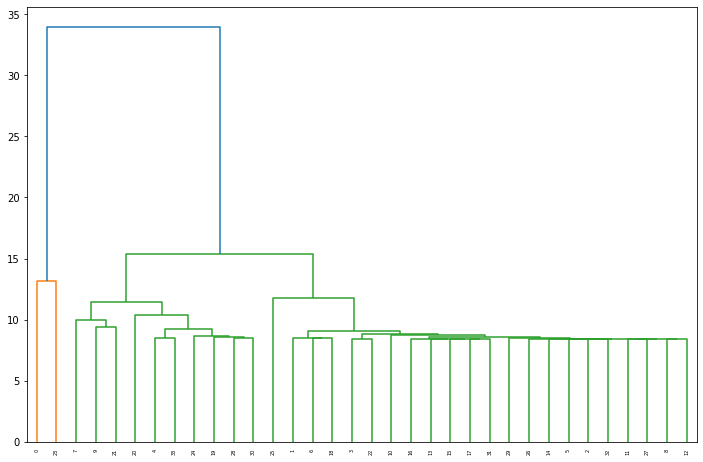

In [32]:
# Generate a dendrogram
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [33]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(case_scaled)

In [34]:
case_df['labels'] = labels
case_df['reporting_phu'] = covid_df.reporting_phu
case_df['reporting_phu_city'] = covid_df.reporting_phu_city
case_df.head()

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,reporting_phu_id,19-oct,19-nov,19-dec,20-jan,20-feb,20-mar,20-apr,20-may,20-jun,...,21-jun,21-jul,21-aug,21-sep,21-oct,21-nov,21-dec,labels,reporting_phu,reporting_phu_city
0,2253,0,0,0,1,7,686,2154,1976,1092,...,1485,583,2308,2219,1330,20,0,0,Peel Public Health,Mississauga
1,2234,0,0,0,2,0,106,87,187,51,...,45,31,94,108,121,6,0,1,Haldimand-Norfolk Health Unit,Simcoe
2,2249,0,0,0,0,0,10,7,6,18,...,27,13,23,52,18,0,0,1,Northwestern Health Unit,Kenora
3,2241,0,0,0,0,0,52,8,4,34,...,23,25,44,128,177,18,0,1,"Kingston, Frontenac and Lennox & Addington Pub...",Kingston
4,2246,0,0,0,0,0,202,348,158,61,...,381,101,526,846,495,35,0,2,Niagara Region Public Health Department,Thorold


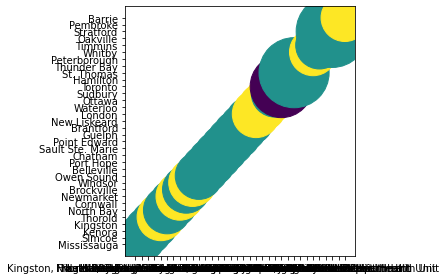

In [36]:
plt.scatter(case_df.reporting_phu, case_df.reporting_phu_city, case_df.reporting_phu_id, c = case_df.labels)
plt.tight_layout()
plt.show()